In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

X_train = X_train/255.0
x_test = x_test/255.0

In [4]:
print('Shape of X_train: ',X_train.shape)
print('Shape of Y_train: ',Y_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


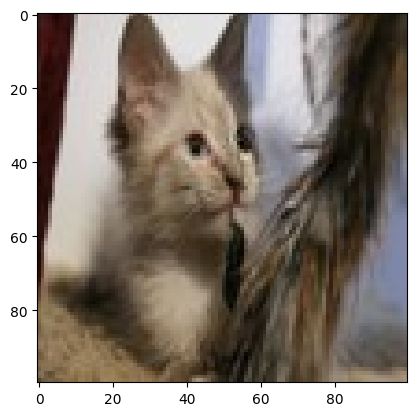

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

C:\Users\jayes\anaconda3\envs\py311_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.5035 - loss: 0.7435
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.5000 - loss: 0.6926
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.5395 - loss: 0.6862
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.5870 - loss: 0.6636
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.6455 - loss: 0.6325
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.7155 - loss: 0.5767
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.7265 - loss: 0.5477
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.7580 - loss: 0.5059
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.7565 - loss: 0.4918
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8060 - loss: 0.4559


In [10]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7125 - loss: 0.5843


[0.5843482613563538, 0.7124999761581421]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Prediction:  cat


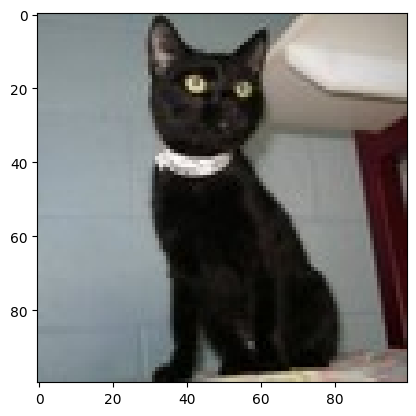

In [11]:
idx2 = random.randint(0, len(x_test))
plt.imshow(x_test[idx2, :])

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print('Prediction: ', pred)